# Book Recommender System
<img src="https://miro.medium.com/max/2400/1*Wv98OnT3RU19cUyD57rBQg.png" />

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
rating_df = pd.read_csv('./ratings.csv')
book_df = pd.read_csv('./books.csv')

In [3]:
rating_df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [4]:
book_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


## Explanatory Data Analysis

In [5]:
# Analysing the year
year_df = pd.DataFrame({
    'Year':book_df['original_publication_year'],
    'title':book_df['original_title']
})
year_df.head()

,Year,title
0,2008.0,The Hunger Games
1,1997.0,Harry Potter and the Philosopher's Stone
2,2005.0,Twilight
3,1960.0,To Kill a Mockingbird
4,1925.0,The Great Gatsby


In [6]:
# dropping missing values
year_df.dropna(inplace=True)

# removing junk values
year_df = year_df[year_df['Year'] > 1700]

# sorting based on year
year_df.sort_values(by='Year',inplace=True)

#printing the dataframe
year_df.head()

,Year,title
477,1719.0,The Life and Strange Surprising Adventures of ...
3641,1722.0,The Fortunes and Misfortunes of the Famous Mol...
528,1726.0,Gulliver’s Travels
3483,1729.0,A Modest Proposal
8905,1729.0,A Modest Proposal and Other Satirical Works


In [7]:
print("Dimensions of the processes year dataframe : ",year_df.shape)

Dimensions of the processes year dataframe :  (9318, 2)


In [8]:
# preprocessing number of books per year
year = []
num_books = []
for i in year_df['Year']:
    if i in year:
        num_books[-1] += 1
    else:
        year.append(i)
        num_books.append(1)

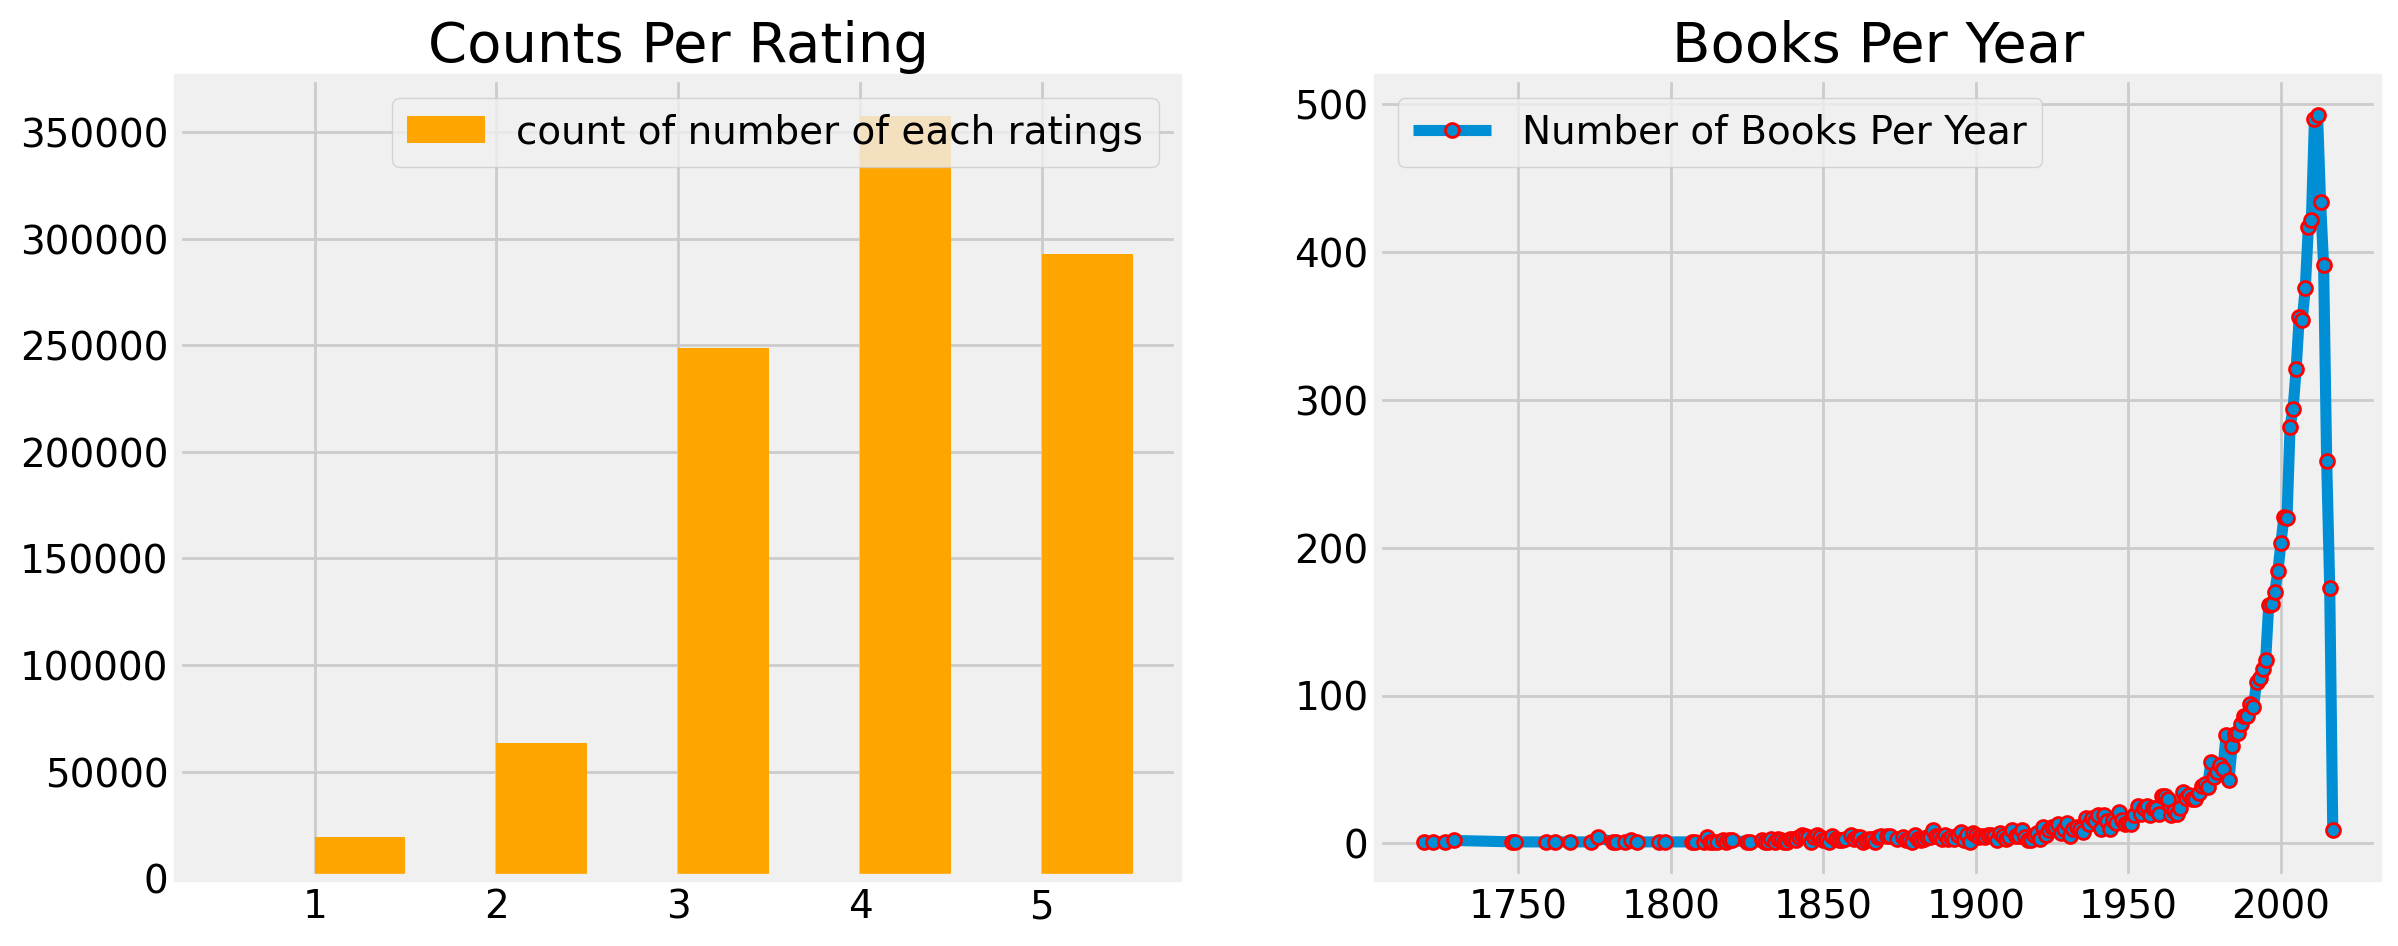

In [9]:
fig = plt.figure(figsize=(10,4),dpi=200)
plt.style.use('fivethirtyeight')
# fist plot
ax1 = fig.add_axes([0,0,0.5,1])
ax1.hist(rating_df['rating'],bins=np.arange(0.5,6,0.5),color='orange',label='count of number of each ratings')
plt.legend()
plt.title('Counts Per Rating')
# second plot
ax2 = fig.add_axes([0.6,0,0.5,1])
ax2.plot(year,num_books,label='Number of Books Per Year',marker='o',markersize=5,markeredgecolor='red')
plt.title('Books Per Year')
plt.legend()
plt.show()

### Conclusion from Counts Per Rating :
This plot shows the number of 4 star rating is higher than the others and we could say that this plot partially follows <b>normal distribution</b>

#### Conclusion from Books per Year : 
This plot shows the number of books that has been released from year <b>1750 to 2000</b>. The number of books that are published have grown recently compared to the previous couple centuries

## Preprocessing the Dataset for Recommender System

In [10]:
recommender_df = rating_df.merge(book_df,on='book_id')
recommender_df = recommender_df.iloc[:,[0,1,2,11]]
recommender_df.dropna()
recommender_df.head()

,book_id,user_id,rating,original_title
0,1,314,5,Harry Potter and the Half-Blood Prince
1,1,439,3,Harry Potter and the Half-Blood Prince
2,1,588,5,Harry Potter and the Half-Blood Prince
3,1,1169,4,Harry Potter and the Half-Blood Prince
4,1,1185,4,Harry Potter and the Half-Blood Prince


In [11]:
print(recommender_df.shape)

(79701, 4)


## Pivot Table

In [12]:
#pivot table
pivot_recomm = pd.pivot_table(recommender_df,index='user_id',columns='original_title',values='rating')
pivot_recomm

original_title,,Animal Farm & 1984,Carter Beats the Devil,The Fellowship of the Ring,"めくらやなぎと、眠る女 [Mekurayanagi to, nemuru onna]",'Salem's Lot The Illustrated Edition,'Tis: A Memoir,1421: The Year China Discovered America,1776,31 Songs,...,Ἰλιάς ; Ὀδύσσεια,Ἰστορίαι,Ὀδύσσεια,Ὀρέστεια,…trotzdem Ja zum Leben sagen: Ein Psychologe erlebt das Konzentrationslager,スプートニクの恋人 [Supūtoniku no Koibito],海辺のカフカ [Umibe no Kafuka],砂の女 [Suna no onna],象の消滅 [Zō no shōmetsu],鋼の錬金術師 1
user_id,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Recommender System with Cosine Similarity

In [13]:
from scipy.spatial import distance
name = "The Catcher in the Rye"
movie = pivot_recomm[name]
movie.replace(to_replace=np.nan,value=0,inplace=True)
j = 0
for i in range(pivot_recomm.shape[1]):
    cosine_sim = distance.cosine(movie,pivot_recomm.iloc[:,i].replace(to_replace=np.nan,value=0))
    if cosine_sim < 0.5:
        print(pivot_recomm.columns[i])
        j+=1
        if j >= 0.5:
            break

Animal Farm: A Fairy Story
